In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

In [82]:
#LOADING DATASET TO PANDAS
big_mart_data = pd.read_csv('/Users/athulnambiar/Desktop/PROJECTS/ML-YT/big_mart_data.csv')

In [83]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [84]:
#NUMBER OF DATAPOINTS AND NUMBER OF FEATURES
big_mart_data.shape

(8523, 12)

In [85]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


CATEGORICAL VALUE
- Item identified
- Item fat content
- Item type
- Outlet identifier
- Outlet size
- Outlet location type
- Outlet Type

In [86]:
big_mart_data.isnull().sum()
    
    # Checking the data types

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

MEAN - AVERAGE VALUE
MOD - MOST REPEATED VALUE

In [87]:
#MEAN VALUE OF ITEM_WEIGHT COLUMN

In [88]:
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [89]:
#FILLING NULL VALUE O FITEMWEIGHT WITH MEAN VALUE
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

In [90]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [91]:
#REPLACING  THE MISSING VALUES IN OUTLET_SIZE WITH MODE
mode_of_outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [92]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [93]:
missing_values = big_mart_data['Outlet_Size'].isnull()
big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [94]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

DATA ANALYSIS

In [95]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


NUMERICAL FEATURES


<Figure size 600x600 with 0 Axes>

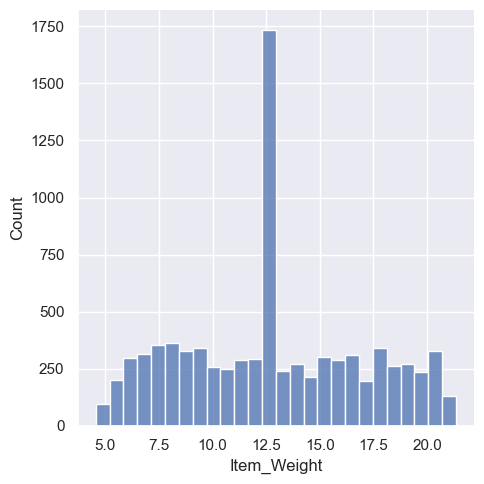

In [98]:
#ITEM_WEIGHT DISTRIBUTION 
sns.set()
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

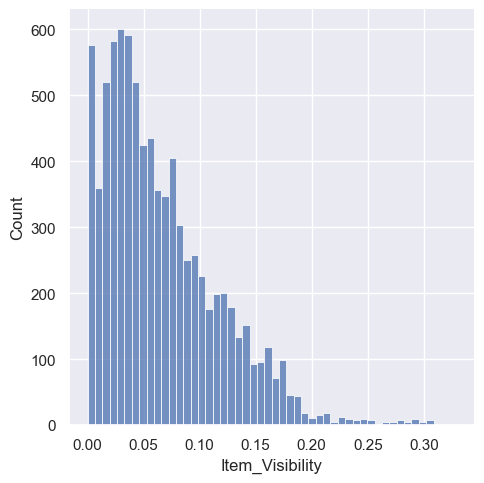

In [99]:
#ITEM_WEIGHT DISTRIBUTION 
sns.set()
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

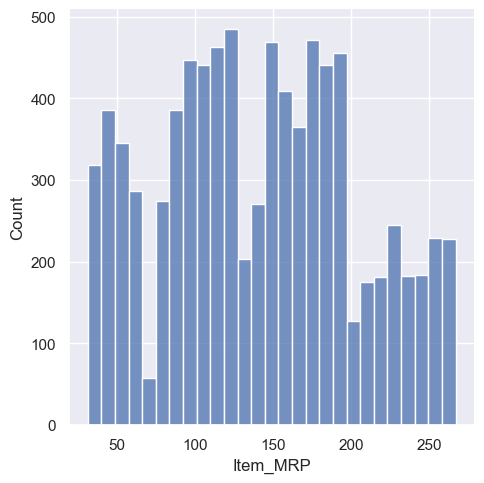

In [100]:
#ITEM_WEIGHT DISTRIBUTION 
sns.set()
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

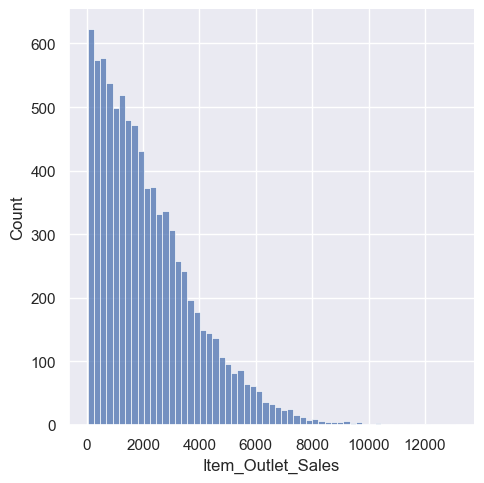

In [102]:
#ITEM_WEIGHT DISTRIBUTION 
sns.set()
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Outlet_Sales'])
plt.show()

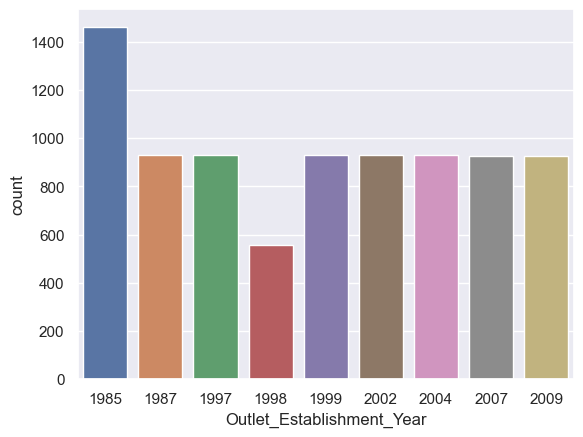

In [104]:
#OUTLET ESTABLISHMENT YEAR COLUMN
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

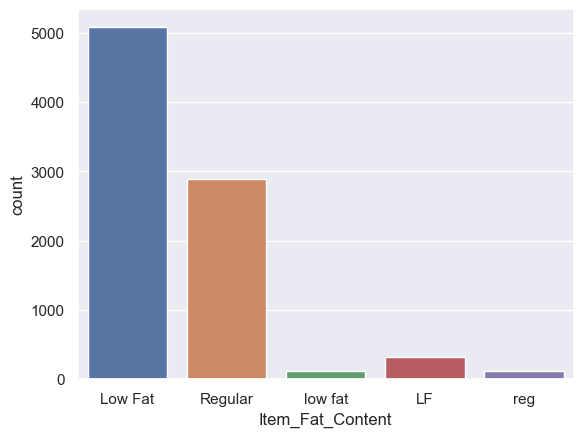

In [105]:
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

<Figure size 3000x600 with 0 Axes>

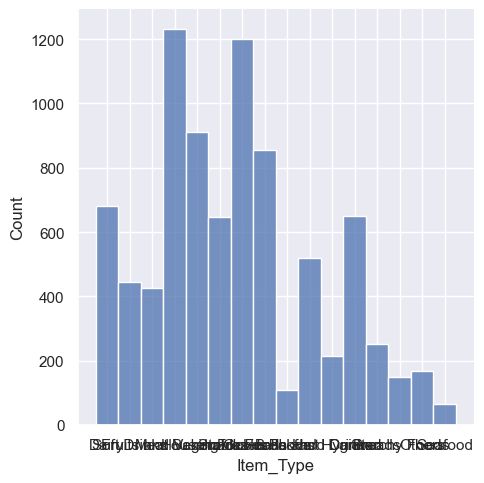

In [107]:
#ITEM_TYPE DISTRIBUTION 
sns.set()
plt.figure(figsize=(30,6))
sns.displot(big_mart_data['Item_Type'])
plt.show()

DATA PREPROCESSING

In [108]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [109]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [110]:
encoder = LabelEncoder()

In [114]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

In [115]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,156,0.016047,156,249.8092,156,1999,156,156,156,3735.1380
1,8,5.92,8,0.019278,8,48.2692,8,2009,8,8,8,443.4228
2,662,17.50,662,0.016760,662,141.6180,662,1999,662,662,662,2097.2700
3,1121,19.20,1121,0.000000,1121,182.0950,1121,1998,1121,1121,1121,732.3800
4,1297,8.93,1297,0.000000,1297,53.8614,1297,1987,1297,1297,1297,994.7052


SPLITTING FEATURES AND TARGET